<a href="https://colab.research.google.com/github/yeonhas/study_2023/blob/main/AI/Ai_20230607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
f=open("BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv", "r")
coindesk_data = pd.read_csv(f, header=0)
seq = coindesk_data[['Closing Price (USD)']].to_numpy()

In [ ]:
def seq2dataset(seq, window, horizon):
  X=[]; Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x = seq[i:(i+window)]
    y = (seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X),  np.array(Y)

In [ ]:
w = 7
h = 1
X, Y = seq2dataset(seq, w, h)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
split = int(len(X)*0.7)
x_train = X[0:split]; y_train=Y[0:split]
x_test = X[split:]; y_test=Y[split:]

In [ ]:
model=Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist=model.fit(x_train, y_train, epochs=200, batch_size=1, validation_data=(x_test, y_test), verbose=2)

Epoch 1/200
250/250 - 3s - loss: 818.2634 - mae: 818.2634 - val_loss: 435.5103 - val_mae: 435.5103 - 3s/epoch - 11ms/step
Epoch 2/200
250/250 - 1s - loss: 562.6880 - mae: 562.6880 - val_loss: 438.6199 - val_mae: 438.6199 - 1s/epoch - 5ms/step
Epoch 3/200
250/250 - 1s - loss: 531.0780 - mae: 531.0780 - val_loss: 319.8012 - val_mae: 319.8012 - 1s/epoch - 5ms/step
Epoch 4/200
250/250 - 1s - loss: 516.6077 - mae: 516.6077 - val_loss: 361.2791 - val_mae: 361.2791 - 1s/epoch - 4ms/step
Epoch 5/200
250/250 - 1s - loss: 536.8342 - mae: 536.8342 - val_loss: 310.2044 - val_mae: 310.2044 - 1s/epoch - 4ms/step
Epoch 6/200
250/250 - 1s - loss: 538.5275 - mae: 538.5275 - val_loss: 546.4417 - val_mae: 546.4417 - 1s/epoch - 4ms/step
Epoch 7/200
250/250 - 2s - loss: 523.3334 - mae: 523.3334 - val_loss: 381.8908 - val_mae: 381.8908 - 2s/epoch - 7ms/step
Epoch 8/200
250/250 - 2s - loss: 472.8280 - mae: 472.8280 - val_loss: 322.0066 - val_mae: 322.0066 - 2s/epoch - 8ms/step
Epoch 9/200
250/250 - 2s - loss

In [ ]:
ev = model.evaluate(x_test, y_test, verbose=0)
print("손실 함수:", ev[0], "MAE:", ev[1])

손실 함수: 167.1132049560547 MAE: 167.1132049560547


In [ ]:
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):", sum(abs(y_test-pred)/y_test)/len(x_test))

4/4 [==============================] - 0s 6ms/step
평균절댓값백분율오차(MAPE): [0.02006926]




###MAE Mean Absolute Error
*  평균 절대 오차 : 모든 절대 오차의 평균
*  이상치 outlier의 영향을 많이 받는 평균 제곱 오차 MSE 대신 사용
  평균보다는 중앙값에 가까움


###MAPE Mean Absolute Percentage Error
*  실제값과 예측값의 차이를 실제값으로 나눠줌
*  오차가 실제값에서 차지하는 상대적인 비율

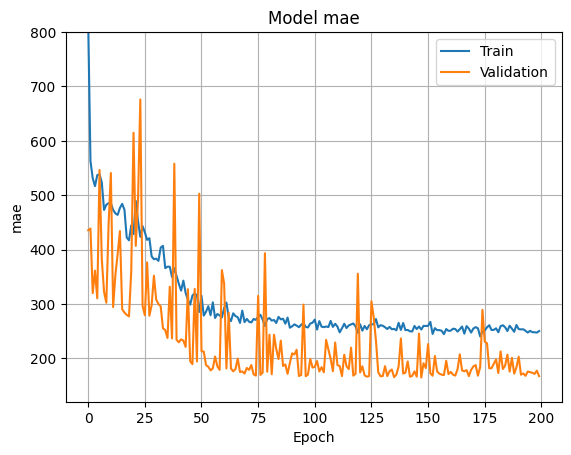

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120, 800])
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

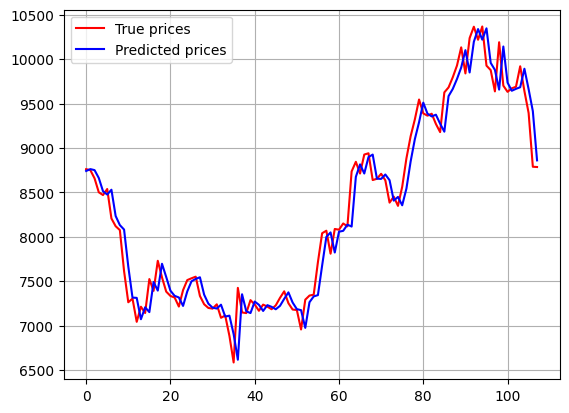

In [ ]:
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()
# 예측값이 실제값과 매우 유사 (똑같X)
# 미세하게 오른쪽으로 이동 right shift
# 이것이 맹점으로 정확하게 예측하지 못한다는 것을 보여준다

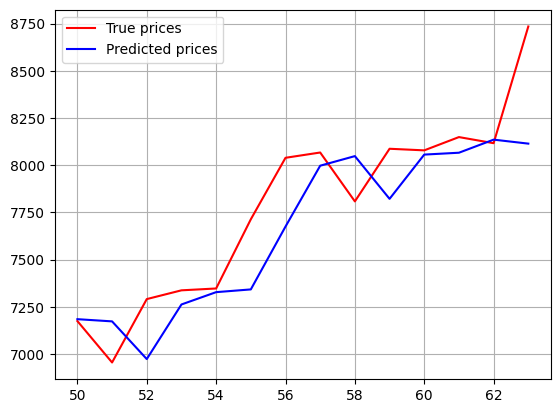

In [ ]:
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()